In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('een_api_dataset.csv', sep=';')

In [34]:
df.shape

(523, 12)

In [53]:
df.drop('Request ID', axis=1, inplace=True)
df.drop('Test case name', axis=1, inplace=True)
df.drop('Test suite name', axis=1, inplace=True)
#df.reset_index(drop=True, inplace=True)

In [47]:
df.columns

Index(['Request ID', 'Test suite name', 'Test case name', 'Endpoint', 'Method',
       'Status Code', 'Start time', 'Duration till headers received[ms]',
       'Duration till body received[ms]', 'Request Body Length',
       'Response Body Length', 'Test Result'],
      dtype='object')

In [56]:
df.describe(include='all')

,Endpoint,Method,Status Code,Start time,Duration till headers received[ms],Duration till body received[ms],Request Body Length,Response Body Length,Test Result
count,523,523,523.000000,523,523.000000,523.000000,523.000000,523.000000,523
unique,40,4,NaN,523,NaN,NaN,NaN,NaN,1
top,/g/aaa/authenticate,POST,NaN,2023-03-14 19:54:46.310,NaN,NaN,NaN,NaN,PASS
freq,85,280,NaN,1,NaN,NaN,NaN,NaN,523
mean,NaN,NaN,240.340344,NaN,735.739962,873.695985,139.175908,624.625239,NaN
std,NaN,NaN,81.244928,NaN,1854.353800,3592.601094,238.505925,1166.768147,NaN
min,NaN,NaN,200.000000,NaN,0.000000,9.000000,0.000000,0.000000,NaN
25%,NaN,NaN,200.000000,NaN,60.000000,63.000000,0.000000,24.000000,NaN
50%,NaN,NaN,200.000000,NaN,129.000000,131.000000,49.000000,135.000000,NaN
75%,NaN,NaN,201.000000,NaN,669.500000,672.500000,86.000000,589.000000,NaN


# Represent the avg length of time to get a response by endpoint

In [58]:
grouped = df.groupby('Endpoint')['Duration till body received[ms]'].mean()

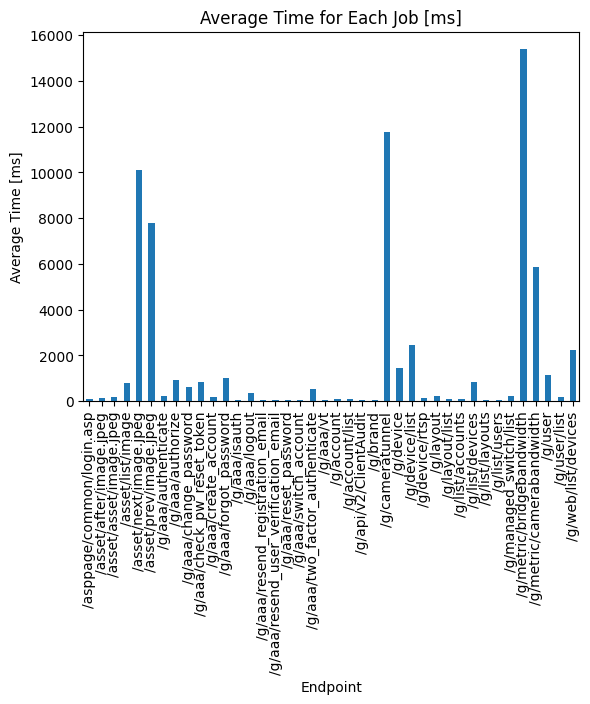

In [60]:
grouped.plot(kind='bar')
plt.xlabel('Endpoint')
plt.ylabel('Average Time [ms]')
plt.title('Avg Time for Each Endpoint [ms]')
plt.show()

In [61]:
# Does it correlate with size of body response?

In [66]:
grouped = df.groupby('Endpoint')['Response Body Length'].mean()

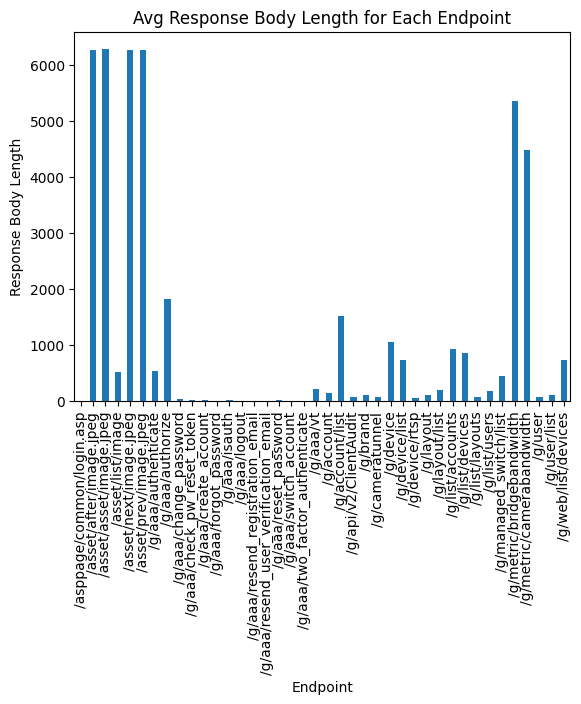

In [67]:
grouped.plot(kind='bar')
plt.xlabel('Endpoint')
plt.ylabel('Response Body Length')
plt.title('Avg Response Body Length for Each Endpoint')
plt.show()

In [68]:
# Does it correlate? i.e. how useful will APIv3 be on performance?

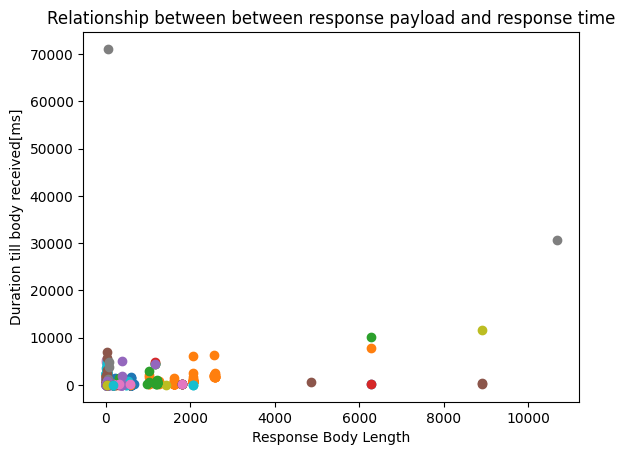

In [78]:
grouped = df.groupby(['Endpoint', 'Response Body Length'])['Duration till body received[ms]'].mean()

# create a scatter plot to represent the relationship between response payload and response time
fig, ax = plt.subplots()
for endpoint in df['Endpoint'].unique():
    endpoint_df = df[df['Endpoint'] == endpoint]
    ax.scatter(endpoint_df['Response Body Length'], endpoint_df['Duration till body received[ms]'], label=endpoint)
ax.set_xlabel('Response Body Length')
ax.set_ylabel('Duration till body received[ms]')
ax.set_title('Relationship between between response payload and response time')
#ax.legend()
plt.show()

In [84]:
length_time_df = df[['Response Body Length', 'Duration till body received[ms]']]

corr = length_time_df.corr().iloc[0,1]

print('Correlation Coefficient: ', corr)

Correlation Coefficient:  0.22418107992733602


In [ ]:
# What endpoint is Max response time

# Avg length of time for PASS response and FAIL response